In [154]:
import numpy as np
import cv2
import tensorflow as tf
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from pathlib import Path
from shutil import copy
import os
import random

import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_resnet_v2 import preprocess_input

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 128
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './data/CNN/train',  # This is the source directory for training images
        target_size=(300, 150),  # All images will be resized to 300 x 150
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['Bishop','Empty','King','Knight','Pawn','Queen','Rook'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 22366 images belonging to 7 classes.


In [24]:
# import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    # Note the input shape is the desired size of the image 300 x 150 with 3 bytes color
    # The first convolution
    Conv2D(16, (3,3), activation='relu', input_shape=(300, 150, 3)),
    MaxPooling2D(2, 2),
    # The second convolution
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # The third convolution
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # The fourth convolution
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # The fifth convolution
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    Flatten(),
    # 128 neuron in the fully-connected layer
    Dense(128, activation='relu'),
    # 5 output neurons for 7 classes with the softmax activation
    Dense(13, activation='softmax')
])


In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 298, 148, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 149, 74, 16)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 147, 72, 32)       4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 73, 36, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 71, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 35, 17, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 33, 15, 64)       

In [25]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [20]:
total_sample=train_generator.n

In [21]:
total_sample

2730

In [22]:
n_epochs = 30

In [27]:
history = model.fit(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=n_epochs,
        verbose=1)

Epoch 1/30
21/21 [==============================] - 42s 2s/step - loss: 1.4310 - acc: 0.5477
Epoch 2/30
21/21 [==============================] - 48s 2s/step - loss: 1.3098 - acc: 0.6018
Epoch 3/30
21/21 [==============================] - 51s 2s/step - loss: 1.1866 - acc: 0.6391
Epoch 4/30
21/21 [==============================] - 41s 2s/step - loss: 0.9918 - acc: 0.7229
Epoch 5/30
21/21 [==============================] - 41s 2s/step - loss: 0.8347 - acc: 0.7410
Epoch 6/30
21/21 [==============================] - 40s 2s/step - loss: 0.6411 - acc: 0.8048
Epoch 7/30
21/21 [==============================] - 40s 2s/step - loss: 0.4961 - acc: 0.8409
Epoch 8/30
21/21 [==============================] - 41s 2s/step - loss: 0.3970 - acc: 0.8657
Epoch 9/30
21/21 [==============================] - 41s 2s/step - loss: 0.2920 - acc: 0.9020
Epoch 10/30
21/21 [==============================] - 40s 2s/step - loss: 0.2042 - acc: 0.9370
Epoch 11/30
21/21 [==============================] - 40s 2s/step - lo

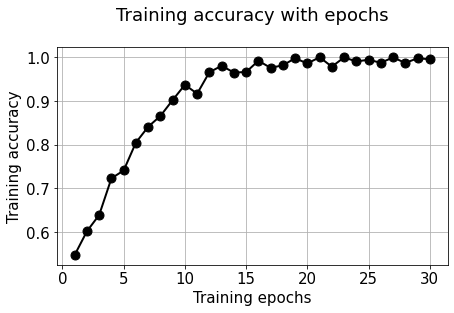

In [28]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

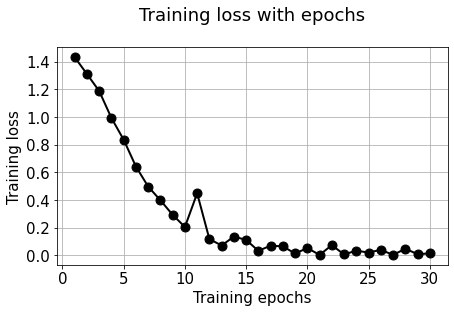

In [29]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['loss'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training loss with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training loss",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [42]:
img = cv2.imread('./data/CNN/test/Pawn/12.jpg')
img = np.expand_dims(img, axis=0)
model.predict(img)

array([[0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [31]:
img.shape

(300, 150, 3)

In [38]:
# model.save_weights('./first_success.h5')

In [161]:
# model.load_weights('./first_success.h5')
model.load_weights('./mc_color_004.h5')

In [47]:
import json
# Get the dictionary containing each metric and the loss for each epoch
history_dict = history.history
# Save it under the form of a json file
json.dump(history_dict, open('./first_history.json', 'w'))

In [50]:
with open('./first_history.json') as json_file:
    data = json.load(json_file)
  
    # Print the type of data variable
    print("Type:", type(data))

Type: <class 'dict'>


In [61]:
data['acc'][29]

0.9953881502151489

In [170]:
# pieces = ['Empty', 'Rook', 'Knight', 'Bishop', 'Queen', 'Pawn', 'King']
pieces = ['Empty','Rook_White','Rook_Black','Knight_White','Knight_Black','Bishop_White','Bishop_Black','Queen_White','Queen_Black','King_White','King_Black','Pawn_White','Pawn_Black']
pieces.sort()
print(pieces)
test_score = 0
N_test = 300
for _ in range(N_test):
    piece = pieces[random.randint(0, len(pieces)-1)]
    basedir = "data/CNN/train/%s/" % piece
    file = random.choice([x for x in os.listdir(
        basedir) if os.path.isfile(os.path.join(basedir, x))])
    y_prob = model.predict(cv2.imread(
        basedir+file).reshape(1, 300, 150, 3))
    y_pred = y_prob.argmax()
    # print(piece, pieces[y_pred])
    if y_pred < 0 or y_pred >= len(pieces):
        print(y_pred, y_prob)
    if piece == pieces[y_pred]:
        test_score += 1
print("TEST:", test_score/N_test)

['Bishop_Black', 'Bishop_White', 'Empty', 'King_Black', 'King_White', 'Knight_Black', 'Knight_White', 'Pawn_Black', 'Pawn_White', 'Queen_Black', 'Queen_White', 'Rook_Black', 'Rook_White']
TEST: 0.63


In [172]:
import os
rootdir = './data/CNN/test'

model.load_weights('./mc_color_006.h5')

# pieces = ['Empty', 'Rook', 'Knight', 'Bishop', 'Queen', 'Pawn', 'King']
pieces = ['Empty','Rook_White','Rook_Black','Knight_White','Knight_Black','Bishop_White','Bishop_Black','Queen_White','Queen_Black','King_White','King_Black','Pawn_White','Pawn_Black']
pieces.sort()
score = 0
total_size = 0
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file == ".DS_Store":
            continue
        piece = subdir.split('/')[-1]
        path = os.path.join(subdir, file)
        y_prob = model.predict(cv2.imread(
            path).reshape(1, 300, 150, 3))
        y_pred = y_prob.argmax()
        if y_pred < 0 or y_pred >= len(pieces):
            print(y_pred, y_prob)
        if piece == pieces[y_pred]:
            score += 1
        total_size += 1
print("TEST:", score/total_size)
        

TEST: 0.889322191272052


In [87]:
test_score

802

In [96]:
base_model = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(300, 150, 3))
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(7, activation='softmax')(x) # New softmax layer
resnet_model = models.Model(inputs=base_model.input, outputs=predictions)

# we chose to train the top 2 inception blocks
# we will freeze the first 249 layers and unfreeze the rest
for layer in resnet_model.layers[:249]:
   layer.trainable = False
for layer in resnet_model.layers[249:]:
   layer.trainable = True


resnet_model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
# this is a similar generator, for validation data
test_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = test_datagen.flow_from_directory(
    'data/CNN/validation',
    target_size=(300, 150),
    batch_size=batch_size,
    class_mode='categorical')

Found 849 images belonging to 7 classes.


In [69]:
resnet_history = resnet_model.fit(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=n_epochs,
        verbose=1)

Epoch 1/30
 2/21 [=>............................] - ETA: 9:05 - loss: 3.3958 - accuracy: 0.4883 

KeyboardInterrupt: 

In [116]:
import cv2 as cv
img = cv.imread("./data/preprocessed/games/runau_schmidt/orig/1.png",0)
blur = cv.GaussianBlur(img,(5,5),0)
_, img_binary = cv.threshold(blur,100,255,cv.THRESH_BINARY)

img_binary_inverted = cv.bitwise_not(img_binary)

# remove noise
morph_kernel = np.ones((15,15),np.uint8)
output = cv.morphologyEx(img_binary_inverted, cv.MORPH_CLOSE, morph_kernel)

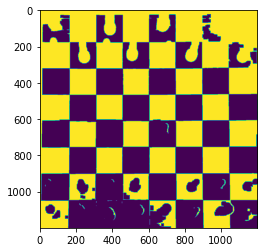

In [117]:
plt.imshow(output)

In [150]:
arr = []
w = output.shape[0]//8
h = output.shape[1]//8
for i in range(8):
    row = []
    for j in range(8):
        # crop = 30
        # square = output[w*i+crop:w*(i+1)-crop, j*h+crop:(j+1)*h-crop]
        # brights = np.count_nonzero(square == 255)
        # darks = np.count_nonzero(square == 0)
        # if brights >= darks:
        #     row.append(1)
        # else:
        #     row.append(0)
        square = output[w*i:w*(i+1), j*h:(j+1)*h]
        brights = np.count_nonzero(square == 255)
        darks = np.count_nonzero(square == 0)
        if i+j % 2 == 1:
            square_color = 1
        else:
            square_color = 0
        if (square_color == 1 and darks/square.size > 0.2) or (square_color == 0 and brights/square.size <= 0.2):
            row.append(0)
        else:
            row.append(1)

        
    arr.append(row)

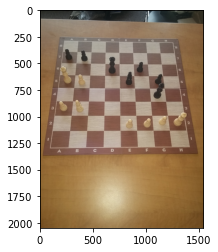

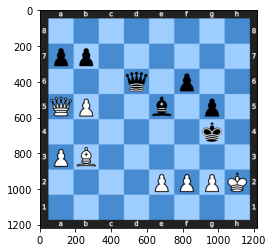

In [85]:
import cv2
import numpy as np 
import sys
from preprocess import preprocess_image
from matplotlib import pyplot as plt
# sys.path.insert(0, './fen')
# from fen import fen

model.load_weights('./mc_color_006.h5')
# model.load_weights('./first_new_weights.h5')

PIECES = ['Empty','Rook_White','Rook_Black','Knight_White','Knight_Black','Bishop_White','Bishop_Black','Queen_White','Queen_Black','King_White','King_Black','Pawn_White','Pawn_Black']
# PIECES = ['Empty','Rook','Knight','Bishop','Queen','King','Pawn']
PIECES.sort()
LABELS = {
    'Empty': '.',
    'Rook_White': 'R',
    'Rook_Black': 'r',
    'Knight_White': 'N',
    'Knight_Black': 'n',
    'Bishop_White': 'B',
    'Bishop_Black': 'b',
    'Queen_White': 'Q',
    'Queen_Black': 'q',
    'King_White': 'K',
    'King_Black': 'k',
    'Pawn_White': 'P',
    'Pawn_Black': 'p',
}

filepath = "./Ex3.jpg"
plt.imshow(cv2.imread(filepath)[...,::-1])
plt.show()
img = preprocess_image(filepath, save=False)
plt.imsave("./temp.jpg", img)
img = cv2.imread("./temp.jpg")
# Remove the temporarily created file
os.remove("./temp.jpg")

def analyze_image(img):
    y_prob = model.predict(img.reshape(1, 300, 150, 3))
    y_pred = y_prob.argmax()
    return PIECES[y_pred]

arr = []
M = img.shape[0]//8
N = img.shape[1]//8
# for y in range(img.shape[0]-1, -1, -M):
for y in range(M-1, img.shape[1], M):
    row = []
    for x in range(0, img.shape[1], N):
        sub_img = img[max(0, y-2*M):y, x:x+N]
        if y-2*M < 0:
            sub_img = np.concatenate(
                (np.zeros((2*M-y, N, 3)), sub_img))
            sub_img = sub_img.astype(np.uint8)

        piece = analyze_image(sub_img)
        row.append(LABELS[piece])
    arr.append(row)

# If there is a Queen but not a King then replace it with a King 
blackKing = False
whiteKing = False 
whitePos = (-1,-1)
blackPos = (-1,-1)
for i in range(8):
    for j in range(8):
        if arr[i][j] == 'K':
            whiteKing = True 
        if arr[i][j] == 'k':
            blackKing = True
        if arr[i][j] == 'Q':
            whitePos = (i,j)
        if arr[i][j] == 'q':
            blackPos = (i,j)
if not whiteKing and whitePos[0] >= 0:
    arr[whitePos[0]][whitePos[1]] = 'K'
if not blackKing and blackPos[0] >= 0:
    arr[blackPos[0]][blackPos[1]] = 'k'

import io

def board_to_fen(board):
    # Use StringIO to build string more efficiently than concatenating
    with io.StringIO() as s:
        for row in board:
            empty = 0
            for cell in row:
                if cell != '.':
                    if empty > 0:
                        s.write(str(empty))
                        empty = 0
                    s.write(cell)
                else:
                    empty += 1
            if empty > 0:
                s.write(str(empty))
            s.write('/')
        # Move one position back to overwrite last '/'
        s.seek(s.tell() - 1)
        # If you do not have the additional information choose what to put
        s.write(' w KQkq - 0 1')
        return s.getvalue()

def svg_to_png(infile, outfile, dpi=300):
    with wand.image.Image(resolution=300) as image:
        with wand.color.Color('transparent') as background_color:
            library.MagickSetBackgroundColor(image.wand,
                                            background_color.resource)
        image.read(filename=infile, resolution=300)
        png_image = image.make_blob("png32")
        with open(outfile, "wb") as out:
            out.write(png_image)

fen_str = board_to_fen(arr)

# Convert FEN to SVG 
import chess
import chess.svg

board = chess.Board(fen_str)
boardsvg = chess.svg.board(board=board)
f = open("./temp.SVG", "w")
f.write(boardsvg)
f.close()

# Convert SVG to PNG 
svg_to_png("./temp.SVG", "./temp.png")
plt.imshow(cv2.imread("./temp.png"))
plt.show()

# Remove temporary files
os.remove("./temp.SVG")
os.remove("./temp.png")

# final = draw_board(fen=fen_str)
# plt.imshow(final)
# plt.show()

In [1]:
from fen import fen 

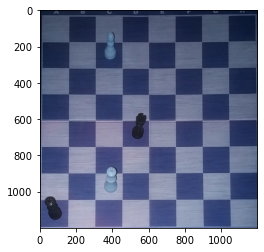

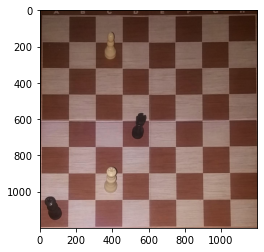

In [235]:
plt.imshow(img)
plt.show()
plt.imsave("./temp.jpg", img)
plt.imshow(cv2.imread("./temp.jpg"))
os.remove("./temp.jpg")

In [244]:
rootdir = './data/CNN/test/Rook_Black'
pieces = ['Empty','Rook_White','Rook_Black','Knight_White','Knight_Black','Bishop_White','Bishop_Black','Queen_White','Queen_Black','King_White','King_Black','Pawn_White','Pawn_Black']
pieces.sort()
score = 0
bad = 0
total_size = 0
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file == ".DS_Store":
            continue
        piece = subdir.split('/')[-1]
        path = os.path.join(subdir, file)
        y_prob = model.predict(cv2.imread(
            path).reshape(1, 300, 150, 3))
        y_pred = y_prob.argmax()
        if y_pred < 0 or y_pred >= len(pieces):
            print(y_pred, y_prob)
        if piece == pieces[y_pred]:
            score += 1
        if pieces[y_pred] == 'Rook_White':
            bad += 1
        total_size += 1
print(bad/total_size)
print(score/total_size)

0.1388888888888889
0.5416666666666666


In [30]:
import chess
import chess.svg

board = chess.Board(fen_str)
boardsvg = chess.svg.board(board=board)
f = open("BoardVisualisedFromFEN.SVG", "w")
f.write(boardsvg)
f.close()

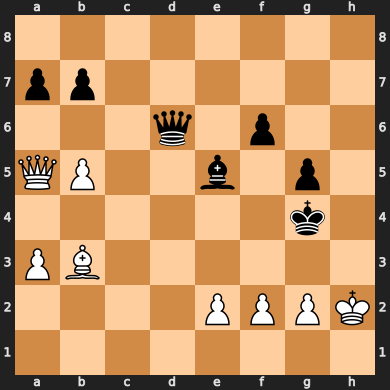

In [31]:
boardsvg

In [32]:
!pip install cairosvg

     |████████████████████████████████| 45 kB 3.5 MB/s 
     |████████████████████████████████| 70 kB 11.7 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.2.0-py3-none-any.whl size=89562 sha256=0911167abd6291c4339d65d58fa83c9688f75aff93070a82280c0d4f4a9c8bff
  Stored in directory: /Users/rizo/Library/Caches/pip/wheels/e8/fa/11/ae7a999afd58d7169974c79b765f4f03880c184d578b1ed445
Successfully built cairocffi


In [34]:
from cairosvg import svg2png

OSError: no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': dlopen(libcairo.so.2, 2): image not found
cannot load library 'libcairo.2.dylib': dlopen(libcairo.2.dylib, 2): image not found
cannot load library 'libcairo-2.dll': dlopen(libcairo-2.dll, 2): image not found

In [53]:
# !pip install svglib
!pip install wand

     |████████████████████████████████| 139 kB 2.2 MB/s 


In [52]:
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPM

ImportError: dlopen(/opt/anaconda3/lib/python3.8/site-packages/reportlab/graphics/_renderPM.cpython-38-darwin.so, 2): Symbol not found: ____chkstk_darwin
  Referenced from: /opt/anaconda3/lib/python3.8/site-packages/reportlab/graphics/../.dylibs/libfreetype.6.dylib (which was built for Mac OS X 10.15)
  Expected in: /usr/lib/libSystem.B.dylib
 in /opt/anaconda3/lib/python3.8/site-packages/reportlab/graphics/../.dylibs/libfreetype.6.dylib

In [66]:
from wand.api import library
import wand.color
import wand.image

svg_file = str(boardsvg).encode('utf-8')
with wand.image.Image() as image:
    with wand.color.Color('transparent') as background_color:
        library.MagickSetBackgroundColor(image.wand, 
                                         background_color.resource) 
    image.read(blob=svg_file, format="svg")
    png_image = image.make_blob("png32")

with open("./output.png", "wb") as out:
    out.write(png_image)
    

TypeError: a bytes-like object is required, not 'NoneType'

In [78]:
def svg_to_png(infile, outfile, dpi=300):
    with wand.image.Image(resolution=300) as image:
        with wand.color.Color('transparent') as background_color:
            library.MagickSetBackgroundColor(image.wand,
                                            background_color.resource)
        image.read(filename=infile, resolution=300)
        png_image = image.make_blob("png32")
        with open(outfile, "wb") as out:
            out.write(png_image)
